# Imports:

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matrixprofile as mp
from sonipy.sonify import SonifyTool

print('imported')

imported


In [25]:
df = pd.read_csv('./SWaT.Dataset/SWaT_Dataset_Attack_v0.csv', sep=';')
print(df.columns)
data = df['LIT101'].apply(lambda x: x.replace(',', '.')).astype('float32')
data.describe()

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (1,9,28,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
Index([' Timestamp', 'FIT101', 'LIT101', ' MV101', 'P101', 'P102', ' AIT201',
       'AIT202', 'AIT203', 'FIT201', ' MV201', ' P201', ' P202', 'P203',
       ' P204', 'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301',
       'MV302', ' MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402',
       'FIT401', 'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501',
       'AIT502', 'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504',
       'P501', 'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602',
       'P603', 'Normal/Attack'],
      dtype='object')


count    449919.000000
mean        607.019897
std         125.303001
min         189.826294
25%         510.011108
50%         530.422485
75%         727.432129
max         925.032288
Name: LIT101, dtype: float64

In [9]:
df.head()

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,28/12/2015 10:00:00 AM,"2,427057","522,8467",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8652","1,649953","189,5988","0,000128152",1,1,1,Normal
1,28/12/2015 10:00:01 AM,"2,446274","522,886",2,2,1,"262,0161","8,396437","328,6337","2,445391",...,2,1,"250,8652","1,649953","189,6789","0,000128152",1,1,1,Normal
2,28/12/2015 10:00:02 AM,"2,489191","522,8467",2,2,1,"262,0161","8,394514","328,6337","2,442316",...,2,1,"250,8812","1,649953","189,6789","0,000128152",1,1,1,Normal
3,28/12/2015 10:00:03 AM,"2,53435","522,9645",2,2,1,"262,0161","8,394514","328,6337","2,442316",...,2,1,"250,8812","1,649953","189,6148","0,000128152",1,1,1,Normal
4,28/12/2015 10:00:04 AM,"2,56926","523,4748",2,2,1,"262,0161","8,394514","328,6337","2,443085",...,2,1,"250,8812","1,649953","189,5027","0,000128152",1,1,1,Normal


In [63]:
C4 = 261.6 # Hz

def matrix_profile_analysis(data, window_size, figsize=(30, 10)):
    # Ploting raw data of the first day
    fig, axes = plt.subplots(2, 1, figsize=figsize)
    labels = list()
    for i in range(24):
        labels.append('{}H'.format(i))
        
    for ax in axes:
        ax.tick_params(colors='w')
        ax.set_xlabel('Temps (H)', c='w')
        ax.set_xticks(np.arange(start=0, stop=3600 * 24, step=3600))
        ax.set_xticklabels(np.array(labels), c='w')
    
    axes[0].set_ylabel('LIT-101', c='w')
    axes[1].set_ylabel('Fréquence (Hz)', c='w')
    
    axes[0].plot(np.arange(data.shape[0]), data, c='b')
    axes[0].set_title('Raw data', c='w')
    

    # matrix profile
    profile = mp.compute(data, window_size)
    #axes[1].plot(np.arange(profile['mp'].shape[0]), profile['mp'], c='b')
    #axes[1].set_title('Matrix profile')

    # discovering discords
    profile = mp.discover.discords(profile, k=10)
    axes[1].plot(np.arange(profile['mp'].shape[0]), profile['mp'], c='b')
    for discord_index in profile['discords']:
        axes[1].plot(np.arange(start=discord_index, stop=discord_index + window_size), 
            profile['mp'][discord_index: discord_index + window_size],
            c='r')
    axes[1].set_title('Matrix profile with potential discords', c='w')
    plt.show()
    return profile['mp']

def sonify(x, filename, frequency_min, frequency_max, duration_constraint=False, duration=5000, save=True):
    frequency_args = {
        'frequency_min' : frequency_min,
        'frequency_max' : frequency_max
    }

    duration_args = {
        'time_total' : duration # ms
    }

    duration_scale = 1. / 5000. # x value / time (ms)

    Tone = SonifyTool(np.arange(x.shape[0]), x,
                        frequency_args = frequency_args,
                        duration_args = duration_args
                    )
    if save:
        Tone.save('.', filename)
    return Tone

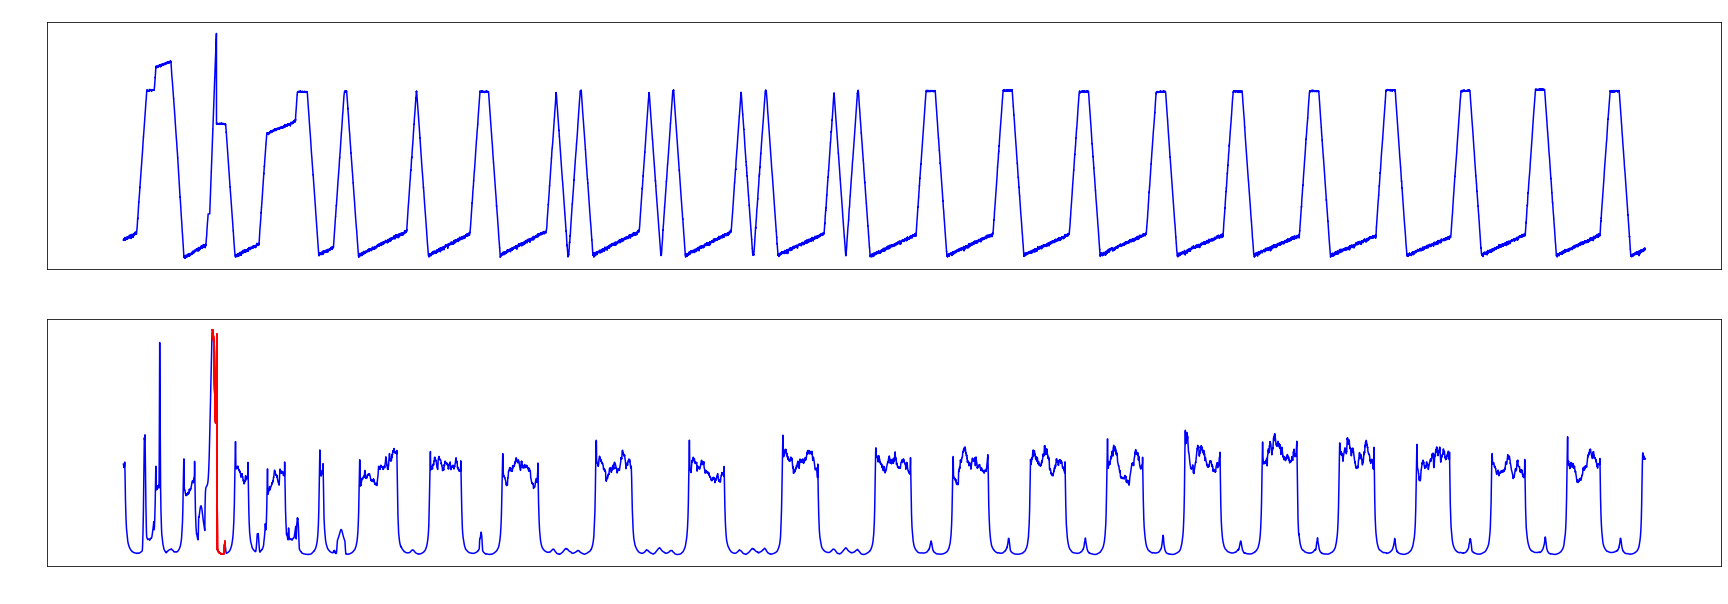

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/LIT101_24H_MP.wav
Saved multitone as .\tones/LIT101_24H_MP.wav.


In [64]:
data = df['LIT101'].apply(lambda x: x.replace(',', '.')).astype('float32')
profile = matrix_profile_analysis(data.values[: 3600 * 24], 700)
Tone = sonify(profile[1:], "LIT101_24H_MP.wav", C4, C4 * 10, duration_constraint=True, duration=20000, save=True)

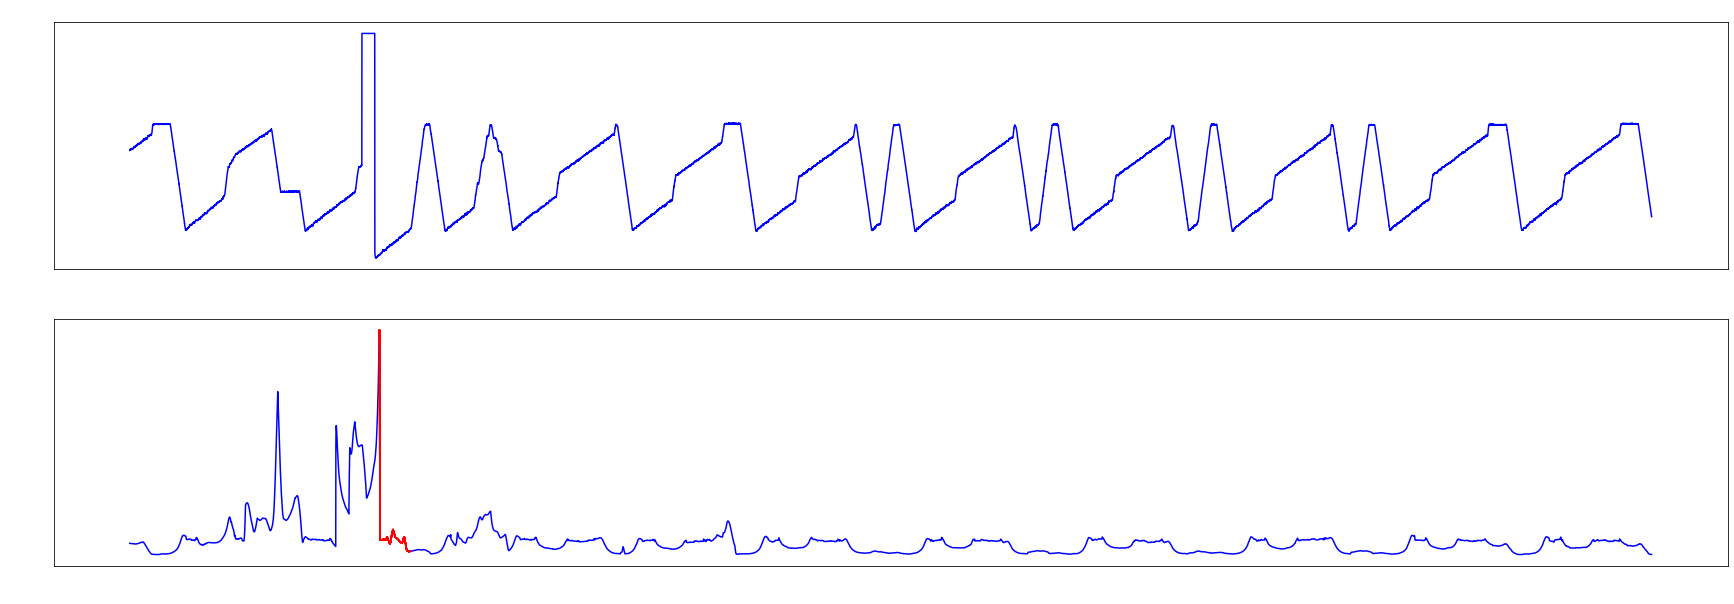

C:\Users\madia\.conda\envs\deeplearning\lib\site-packages\sonipy\thinkdsp.py:734: UserWarning: Can't add these waveforms; their time arrays don't line up.
  "Can't add these waveforms; their " "time arrays don't line up."
multitones created
Writing .\tones/LIT301_24H_MP.wav
Saved multitone as .\tones/LIT301_24H_MP.wav.


In [66]:
data = df['LIT301'].apply(lambda x: x.replace(',', '.')).astype('float32')
profile = matrix_profile_analysis(data.values[: 3600 * 14], 1000)
Tone = sonify(profile[1:], "LIT301_24H_MP.wav", C4, C4 * 10, duration_constraint=True, duration=20000, save=True)

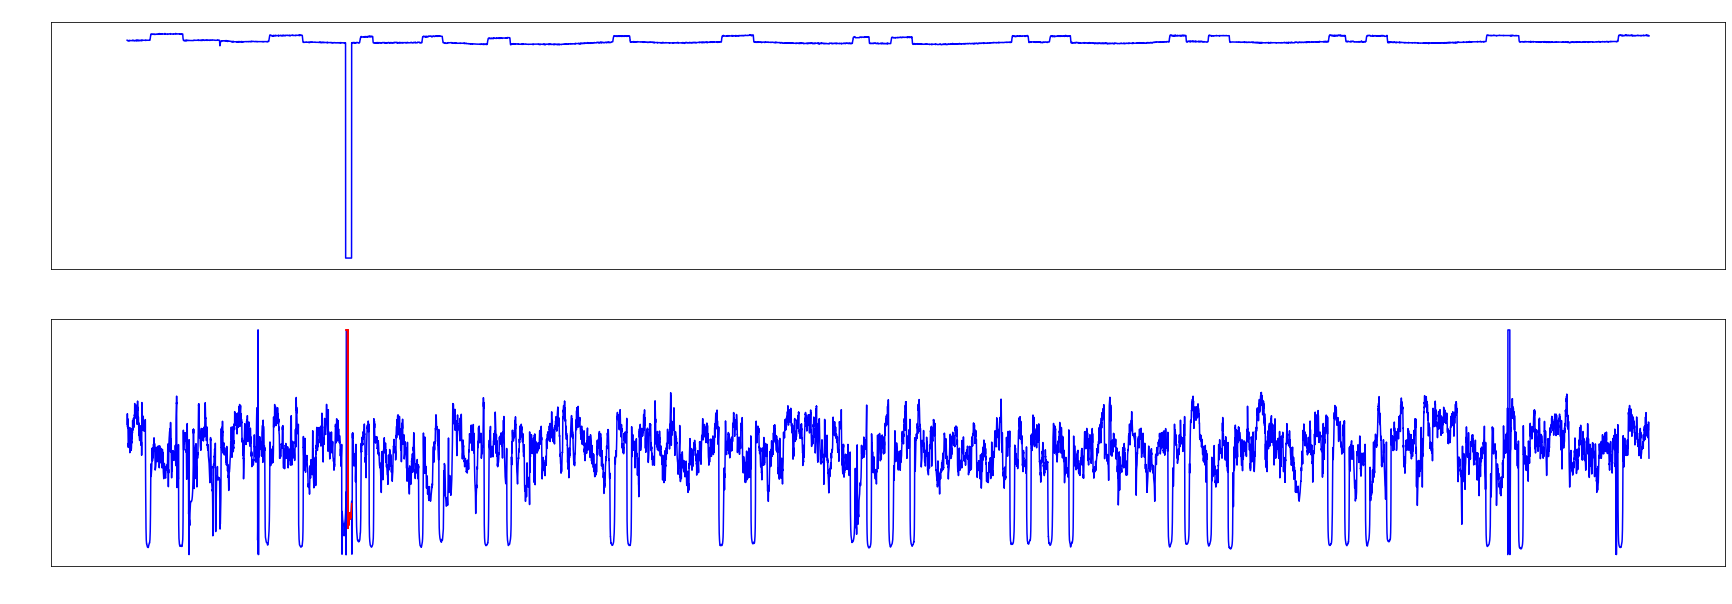

In [33]:
data = df['AIT202'].apply(lambda x: x.replace(',', '.')).astype('float32')
matrix_profile_analysis(data.values[: 3600 * 14], 150)